## IMPORTING LIBRARIES

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Configure plot size
plt.rcParams['figure.figsize'] = (14, 8)

# Set random seed for reproducibility
RANDOM_SEED = 42

# Labels for classification
LABELS = ["Normal", "Fraud"]
import warnings
warnings.filterwarnings('ignore')


In [287]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Exploratory Data Analysis

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [290]:
data.isnull().values.any()

True

In [291]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes


Class
0.0    1983
1.0       2
Name: count, dtype: int64

In [292]:
# Get the Fraud and the normal dataset 
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [293]:
print(fraud.shape,normal.shape)

(2, 31) (1983, 31)


In [294]:
## We need to analyze more amount of information from the transaction data
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [295]:
normal.Amount.describe()

count    1983.000000
mean       68.404892
std       241.572682
min         0.000000
25%         4.950000
50%        15.090000
75%        63.285000
max      7712.430000
Name: Amount, dtype: float64

## VISUALIZATION

Text(0, 0.5, 'Frequency')

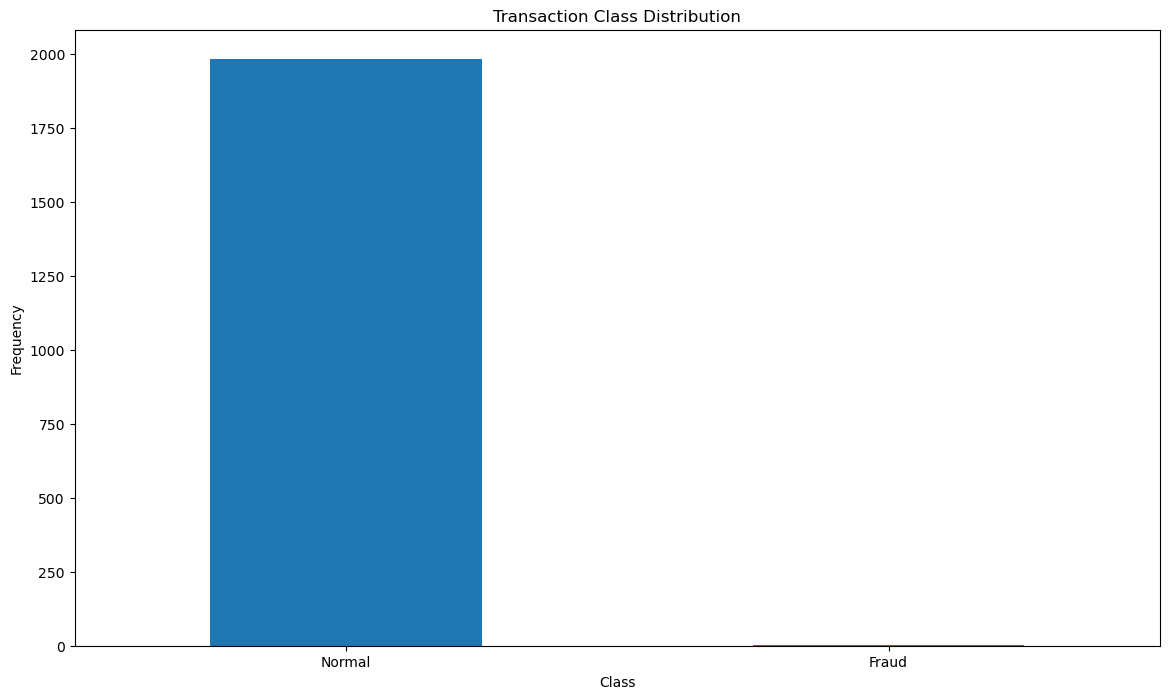

In [297]:
#barplot
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

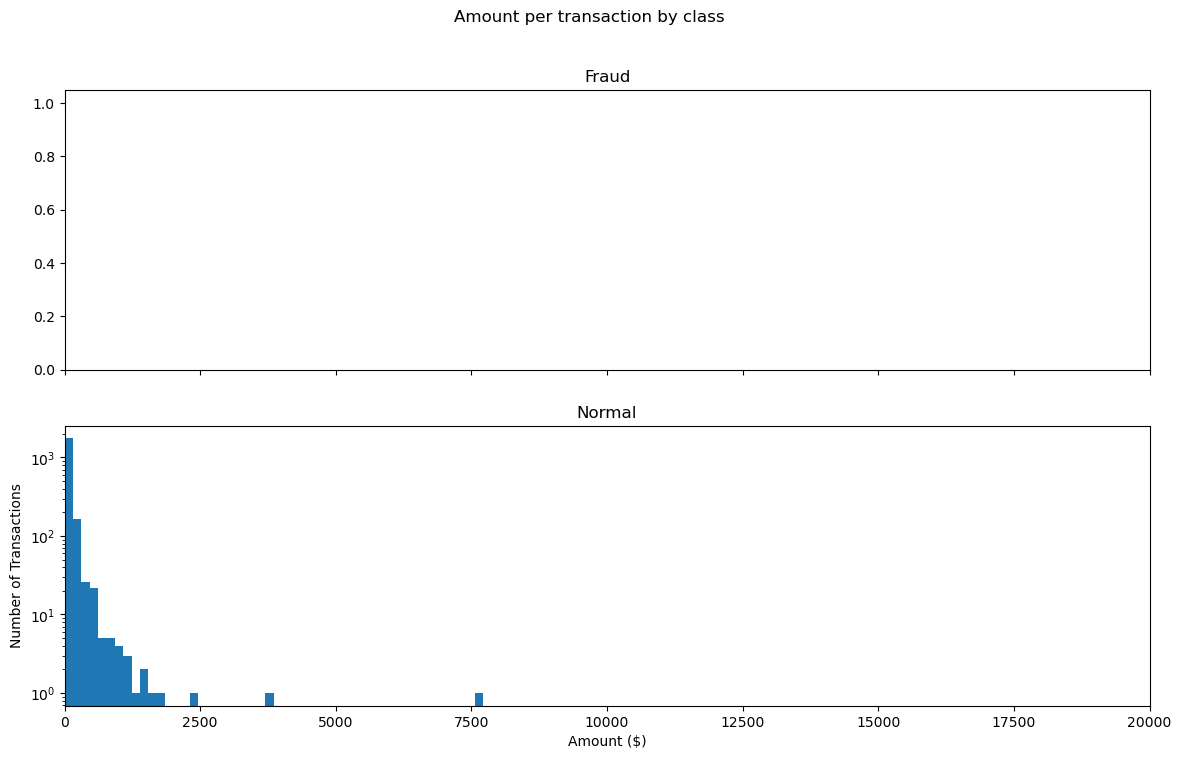

In [298]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

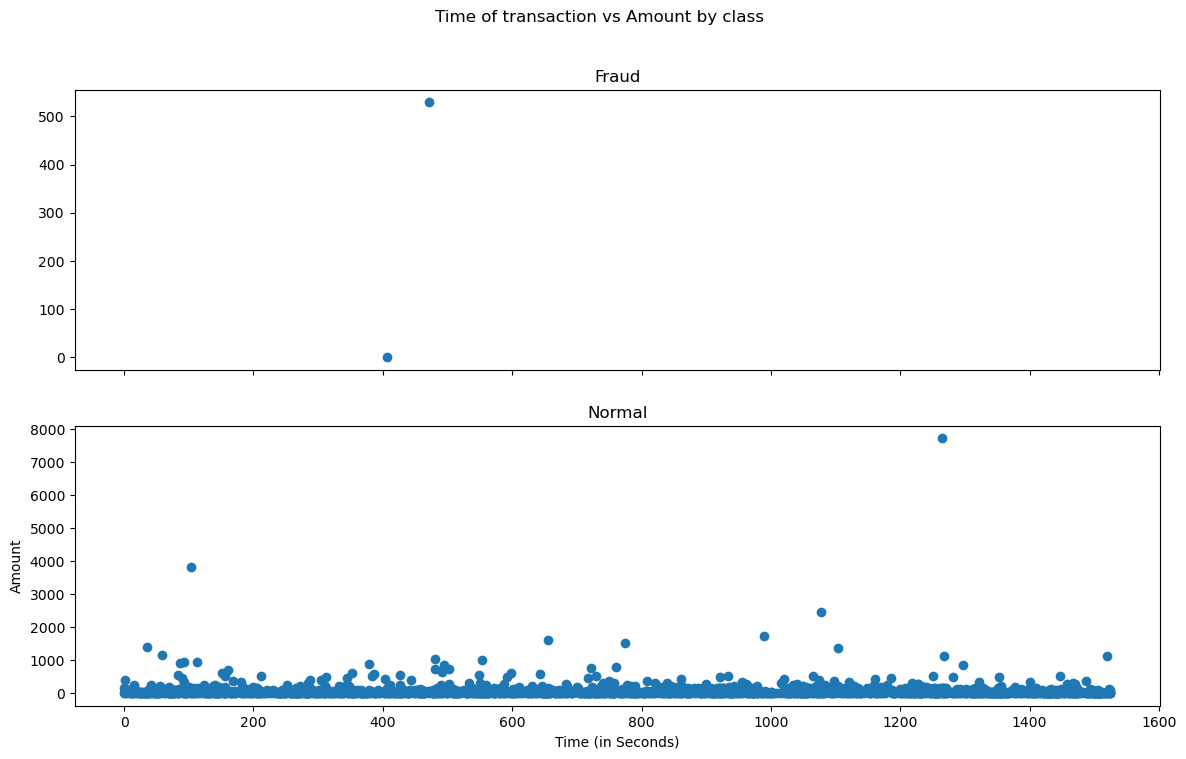

In [299]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

# Scatter plot for fraudulent transactions
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

# Scatter plot for normal transactions
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

# Labels
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

# Show the plots
plt.show()


In [300]:
#Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)
data1.shape

(199, 31)

In [301]:
data.shape

(1986, 31)

In [302]:
#Determine the number of fraud and valid transactions in the dataset
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [303]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.005050505050505051
Fraud Cases : 1
Valid Cases : 198


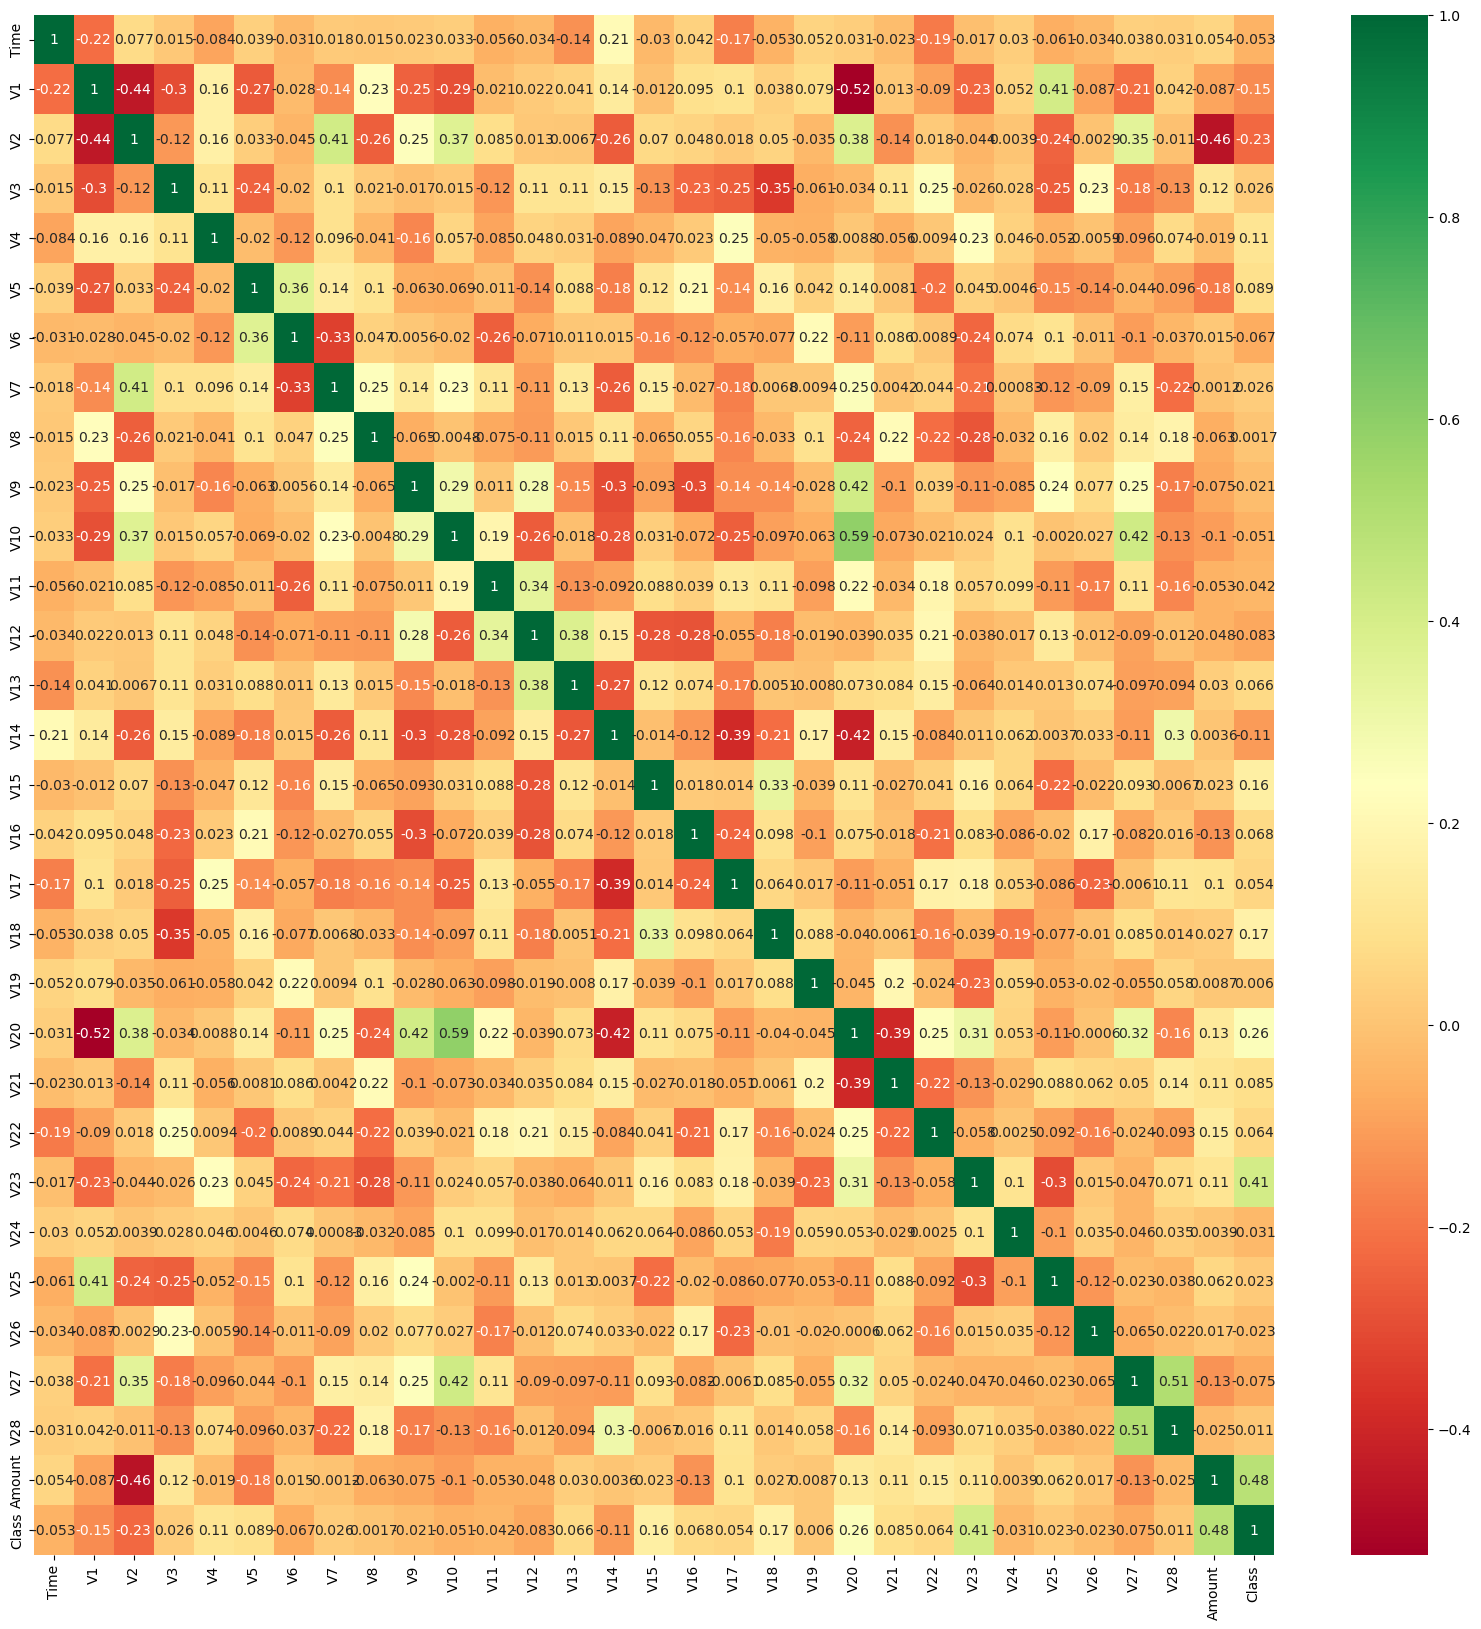

In [304]:
## Correlation
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [305]:
#Create independent and Dependent Features
x = data1.drop('Class', axis=1) #feature
y=data1['Class'] #target
# Define a random state 
state = np.random.RandomState(42)


In [306]:
#Print the shapes of X & Y
print(x.shape)
print(y.shape)

(199, 30)
(199,)


##### Outlier detection methods

In [308]:
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(x), 
                                       contamination=outlier_fraction, random_state=state, verbose=0),
    
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski', 
                                              p=2, metric_params=None, contamination=outlier_fraction),
    
    
}



In [309]:
type(classifiers)

dict

In [310]:
# Create the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, max_samples=len(x), 
                                       contamination=outlier_fraction, random_state=state, verbose=0)

# Fit the model to the data and make predictions
isolation_forest.fit(x)
y_pred=isolation_forest.predict(x)

# Reshape the predictions to 1 for fraud, 0 for valid
y_pred[y_pred == 1] = 0  # 1 for normal -> 0 for valid
y_pred[y_pred == -1] = 1  # -1 for outliers -> 1 for fraud

# Calculate errors
n_errors= (y_pred != y).sum()

#  Classification Metrics
print("Isolation Forest: {} errors".format(n_errors))
print("Accuracy Score:")
print(accuracy_score(y, y_pred))
print("Classification Report:")
print(classification_report(y, y_pred))


Isolation Forest: 2 errors
Accuracy Score:
0.9899497487437185
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       198
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99       199
   macro avg       0.50      0.50      0.50       199
weighted avg       0.99      0.99      0.99       199



In [311]:
# Create the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                             leaf_size=30, metric='minkowski', 
                             p=2, metric_params=None, contamination=outlier_fraction)

# Fit the model to the data and make predictions
y_pred = lof.fit_predict(x)

# Since LOF returns -1 for outliers (fraud) and 1 for normal, we need to convert it
y_pred[y_pred == 1] = 0  # 1 for normal -> 0 for valid
y_pred[y_pred== -1] = 1  # -1 for outliers -> 1 for fraud

# Calculate errors
n_errors = (y_pred != y).sum()

#  Classification Metrics
print("Local Outlier Factor: {} errors".format(n_errors))
print("Accuracy Score:")
print(accuracy_score(y, y_pred))
print("Classification Report:")
print(classification_report(y, y_pred))


Local Outlier Factor: 0 errors
Accuracy Score:
1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       198
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



In [312]:
lof_scores = lof.negative_outlier_factor_
lof_scores

array([-1.0232474 , -1.0200564 , -1.19294732, -1.02758164, -0.99526307,
       -0.97903898, -0.96181055, -1.16565501, -1.10036186, -0.98272916,
       -1.09857401, -1.20013078, -1.00929434, -1.06674648, -0.99143148,
       -1.11880255, -1.10560196, -1.06606923, -2.75153604, -1.02350556,
       -1.12914973, -5.53518471, -0.97993742, -1.01446078, -1.05746174,
       -0.97903898, -0.9700947 , -1.000611  , -1.11689048, -1.04291192,
       -1.13219565, -1.01761109, -1.19186503, -1.01804143, -0.99510513,
       -1.04502286, -1.00025503, -1.11101801, -1.00436934, -1.01558593,
       -1.29486905, -1.05338306, -0.99315092, -0.95963108, -1.03423388,
       -0.9593923 , -1.06171718, -0.96417388, -1.0303292 , -1.03095384,
       -1.01303725, -1.01646935, -1.01235228, -0.97880839, -1.03060701,
       -0.96707055, -1.11255981, -1.01561871, -0.99500245, -1.04083022,
       -1.0119398 , -1.17491008, -1.04012892, -1.000088  , -0.96162296,
       -1.11610064, -1.03107682, -0.98731117, -1.55923427, -1.01

In [313]:
# Apply Random OverSampling to balance the dataset
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)
pd.Series(y_resampled).value_counts()


Class
0.0    198
1.0    198
Name: count, dtype: int64

## Training and Testing

In [315]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2,stratify=y_resampled, random_state=42)


In [316]:

# Train the model on resampled data
clf = SVC(kernel='rbf', random_state=42)
clf.fit(x_resampled, y_resampled)



SVC(random_state=42)

In [317]:
clf.score(x_test,y_test)

1.0

In [318]:
clf.score(x_train,y_train)

0.9968354430379747

In [319]:
y_pred_test = clf.predict(x_test)  
pd.DataFrame({'predicted y':y_pred_test,'actual y':y_test})

,predicted y,actual y
187,0.0,0.0
390,1.0,1.0
369,1.0,1.0
376,1.0,1.0
199,1.0,1.0
...,...,...
100,0.0,0.0
265,1.0,1.0
250,1.0,1.0
104,0.0,0.0


## EVALUATION

In [320]:

# Evaluate the resampled model
print("\nAccuracy after resampling (SVM): ", accuracy_score(y_pred_test, y_test))
print("Classification Report after resampling (SVM):")
print(classification_report(y_test, y_pred_test))



Accuracy after resampling (SVM):  1.0
Classification Report after resampling (SVM):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



##### Making a predictive system

In [372]:

prediction = clf.predict([x_resampled.to_numpy()[390]])

# Print if the case is "normal" or "fraud" based on the prediction
if prediction[0] == 0:
    print("\n Normal case")
else:
    print("\n Fraud case" )



 Fraud case


In [374]:
print(y_resampled[390])

1.0
